# Lending Club Loan Project
### Danny Mathieson - March 2022

### Downloading and Displaying the Dataset

In [1]:
import numpy as np
import pandas as pd

In [7]:
df = pd.read_csv('datasets/loan_data.csv')
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [8]:
df.shape

(9578, 14)

In [6]:
# check for nulls
df.isna().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

### 1. Feature Transformation - Transform Categorical Values into Numerical Values

In [10]:
df.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

In [11]:
# Only purpose needs to be changed to numerical values - get dummies
df_dummy = pd.get_dummies(df, drop_first=True)
df_dummy.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [17]:
df_dummy.columns

Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement',
       'purpose_major_purchase', 'purpose_small_business'],
      dtype='object')

### 2. EDA on Different Factors of the Dataset

In [23]:
# Describe the data, split columns into either binary or numerical sub-types
df_dummy.describe()
numerical_cols = ['int.rate','installment','log.annual.inc','dti','fico','days.with.cr.line','revol.bal','revol.util','inq.last.6mths', 'delinq.2yrs', 'pub.rec']
binary_cols = ['credit.policy','purpose_credit_card', 'purpose_debt_consolidation','purpose_educational','purpose_home_improvement','purpose_major_purchase','purpose_small_business']

In [20]:
from matplotlib import pyplot as plt
import seaborn as sns

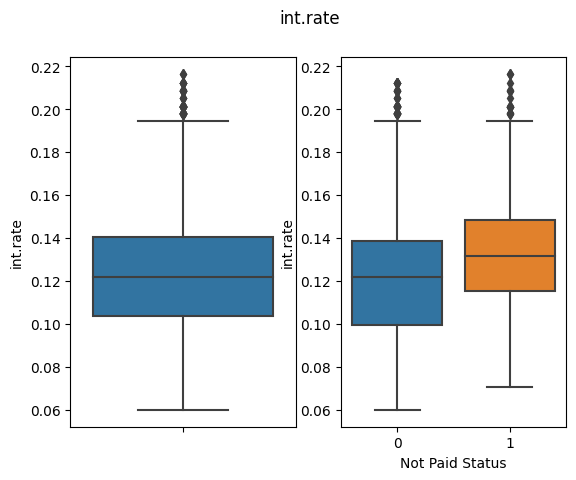

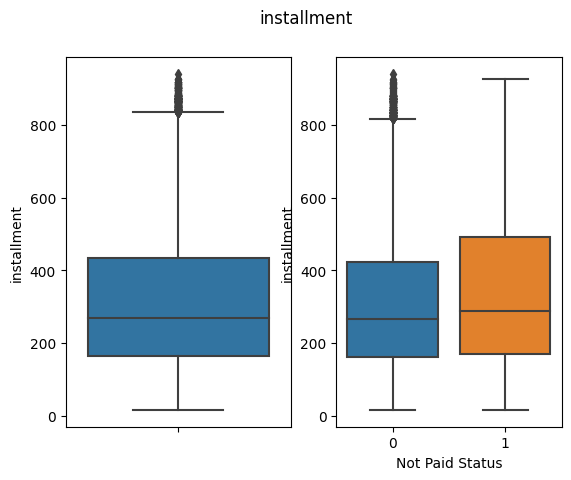

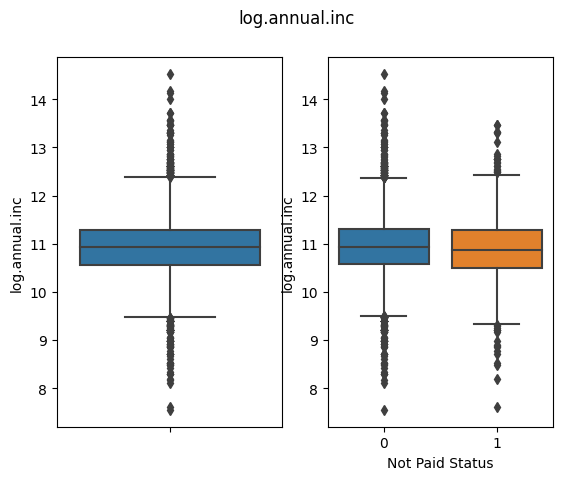

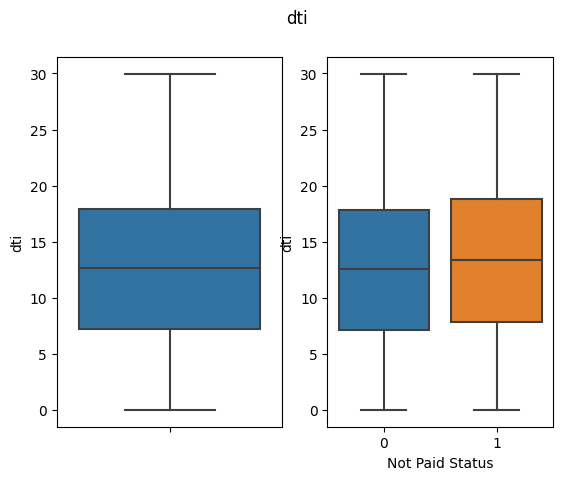

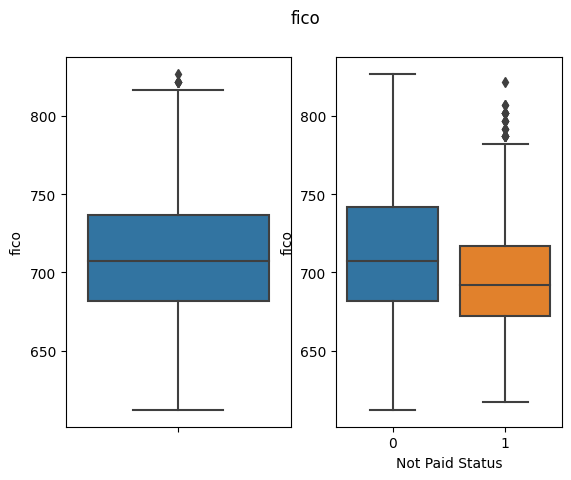

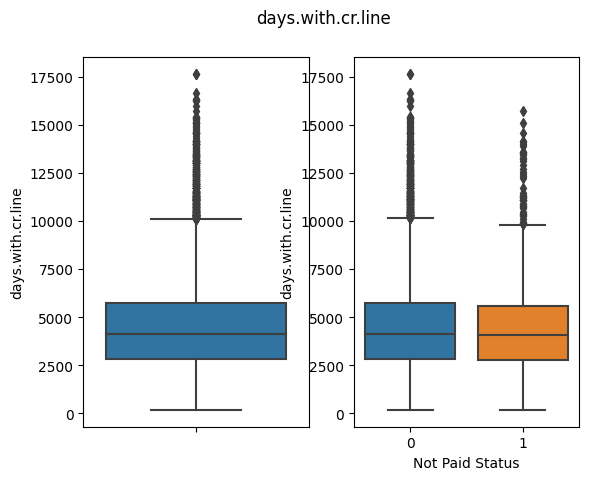

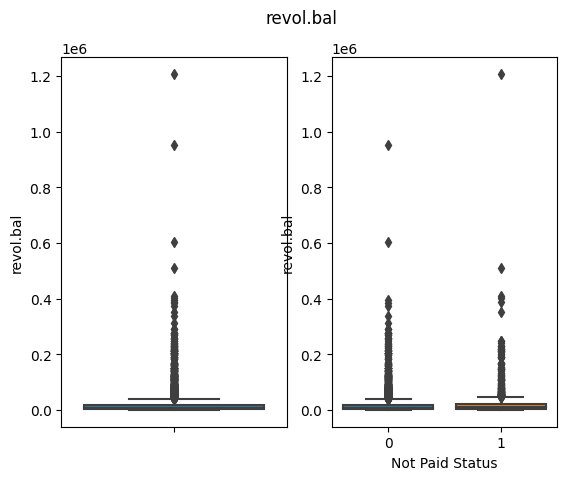

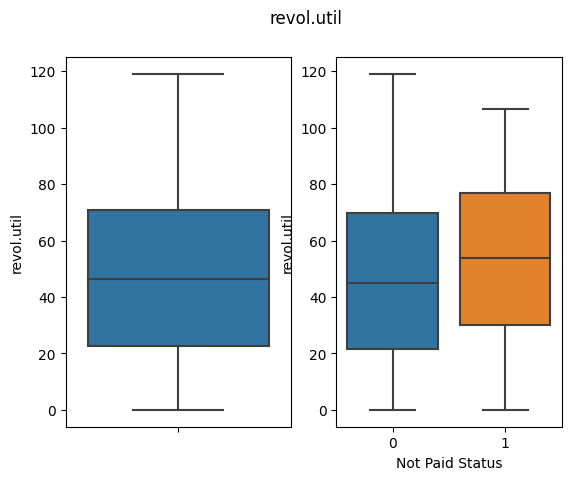

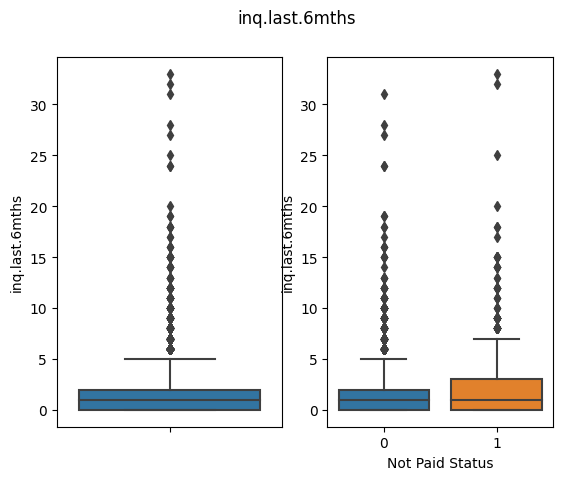

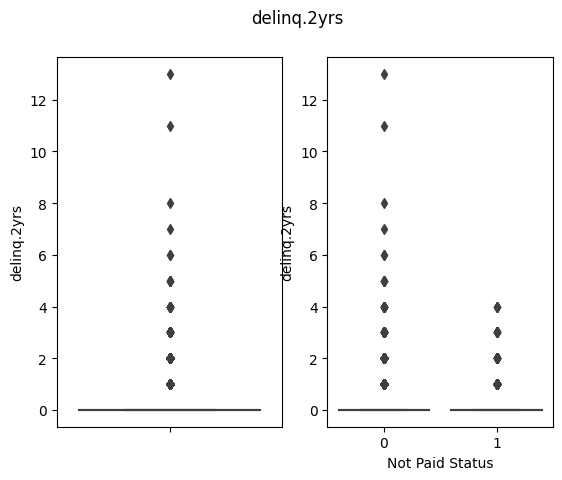

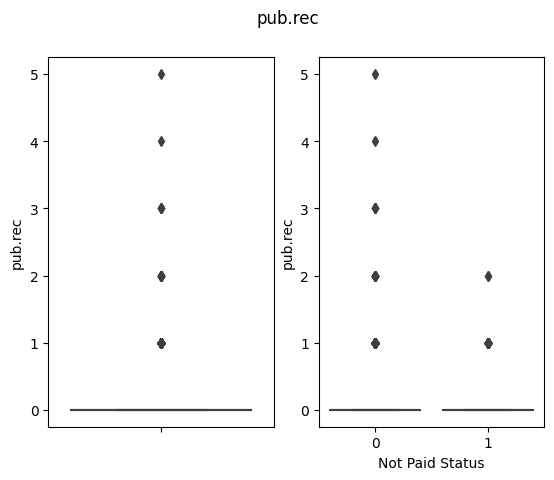

In [26]:
# Loop over numerical columns - Box Plot overall and by fully paid status
for c in numerical_cols:
    # get datasets by category
    total_data = df_dummy[[c]]
    cat_data = df_dummy[[c, 'not.fully.paid']]
    # create boxplots
    sns.boxplot(x=None, y=c, data=total_data, ax=plt.subplot(1,2,1))
    sns.boxplot(x='not.fully.paid', y=c, data=cat_data, ax=plt.subplot(1,2,2))
    # format chart and show
    plt.suptitle(c)
    plt.xlabel('Not Paid Status')
    plt.show()

##### - int.rate
    - Generally int.rate seems to correspond with a higher liklihood of not paying as the 25%, Median, and 75% are all higher than the paid class by a full percent or two
    - The upper extreme doesn't seem to impact the outcome much as the max percent excluding outliers is the same and they seem to have even numbers of outliers on the high end
    - interesting how no one with a sub 7% rate defaulted  
##### - installment
    - Once we start to get above 3.5 years the liklihood of default seems to go up, especially above 5 years  
##### - log.annual.inc - nothing  
##### - dti - nothing  
##### - fico
    - On first glance, lower fico scores definitely seem to have an impact on payback liklihood, but the entire range of paid back loans' fico scores contains the range of not paid back loans, including outliers.  
##### - days.with.cr.line - nothing  
##### - revol.bal - scale is too messed up to see much  
##### - revol.util
    - higher utilization rates has a slight impact on not paying back fully  
##### - inq.last.6mths
    - slightly impactful if above 2  
##### - delinq.2yrs 
    - not enough non-zero data
    - more outliers that have paid pack than haven't  
#####  pub.rec 
    - not enough non-zero data
    - more outliers that have paid pack than haven't  